In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-dataset/All_Years.xls
/kaggle/input/world-happiness-dataset/2023_ONLY.xls


In [4]:
!pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 888.4 kB/s eta 0:00:000:00:01


In [5]:
import pandas as pd
data_2023 = pd.read_excel("/kaggle/input/world-happiness-dataset/2023_ONLY.xls")
data_all = pd.read_excel("/kaggle/input/world-happiness-dataset/All_Years.xls")

# Question 1
1. Which country has the highest score? Why?
2. Are there any null values? How does this dataset need to be cleaned?
3. Is there any correlation between the features?
4. Are the minimum and maximum happiness scores reasonable? Are there any
outliers?
5. What is the mean happiness score?

### 1. Which country has the highest score? Why?


#### 2023

In [11]:
df = pd.DataFrame(data_2023)

# Find the country with the highest score
highest_score_country = df[df['Ladder score'] == df['Ladder score'].max()]['Country name'].values[0]
print("Country with the highest score in 2023:", highest_score_country)


Country with the highest score in 2023: Finland


#### Rest all years

In [26]:
df2 = pd.DataFrame(data_all)

# Find the country with the highest score for each year
highest_score_countries = df2.loc[df2.groupby('year')['Life Ladder'].idxmax()][['year', 'Country name', 'Life Ladder']]
print("Country with the highest score for each year:")
print(highest_score_countries)

Country with the highest score for each year:
      year Country name  Life Ladder
505   2005      Denmark     8.018934
623   2006      Finland     7.672449
506   2007      Denmark     7.834233
507   2008      Denmark     7.970892
508   2009      Denmark     7.683359
509   2010      Denmark     7.770515
510   2011      Denmark     7.788232
1868  2012  Switzerland     7.776209
334   2013       Canada     7.593794
513   2014      Denmark     7.507559
1477  2015       Norway     7.603434
631   2016      Finland     7.659843
632   2017      Finland     7.788252
633   2018      Finland     7.858107
634   2019      Finland     7.780348
635   2020      Finland     7.889350
636   2021      Finland     7.794378
637   2022      Finland     7.728998


/tmp/ipykernel_33/2496992636.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


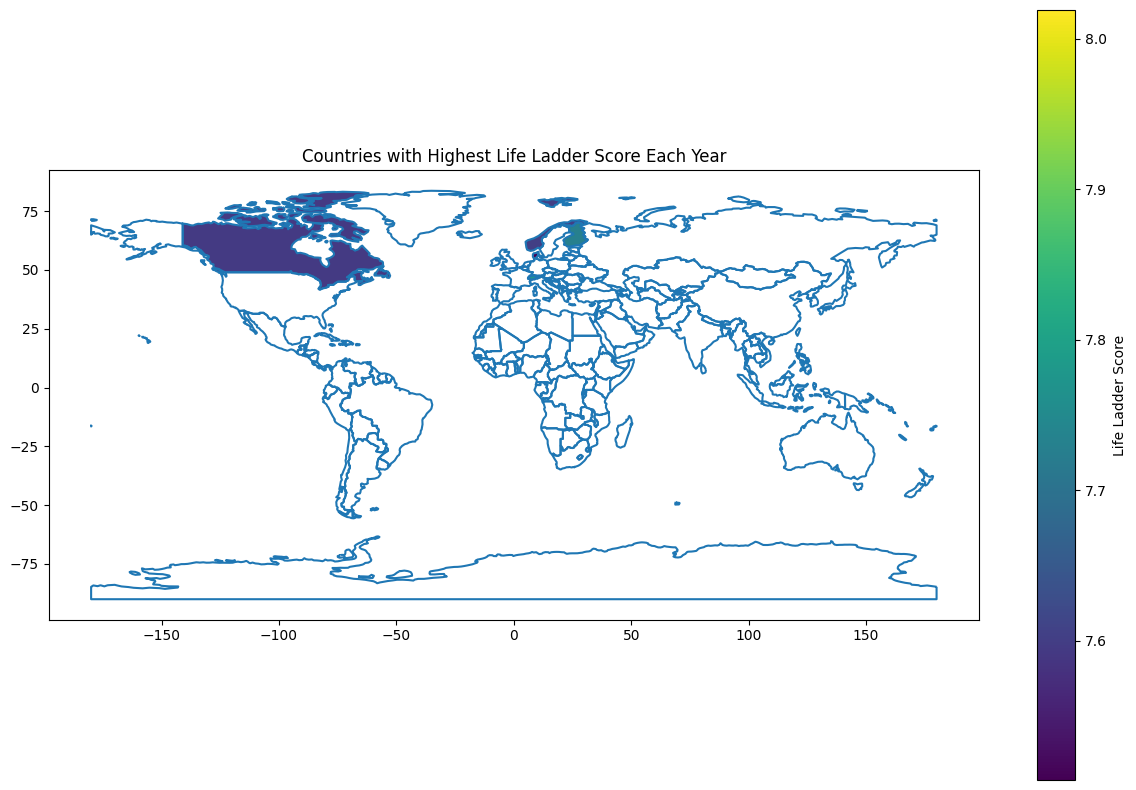

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge highest score countries with world dataframe
merged_df = world.merge(highest_score_countries, how='left', left_on='name', right_on='Country name')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
merged_df.plot(column='Life Ladder', cmap='viridis', ax=ax, legend=True, legend_kwds={'label': "Life Ladder Score"})
plt.title('Countries with Highest Life Ladder Score Each Year')
plt.show()


### Are there any null values? How does this dataset need to be cleaned?

#### 2023

In [13]:
null_values = df.isnull().sum()
print("Null values in 2023 :")
print(null_values)

Null values in 2023 :
Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64


#### Rest all years

In [28]:
# Check for null values
null_values = df2.isnull().sum()
print("Null values:")
print(null_values)

# Dataset seems clean, no null values


Null values:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64


### Is there any correlation between the features?

#### 2023

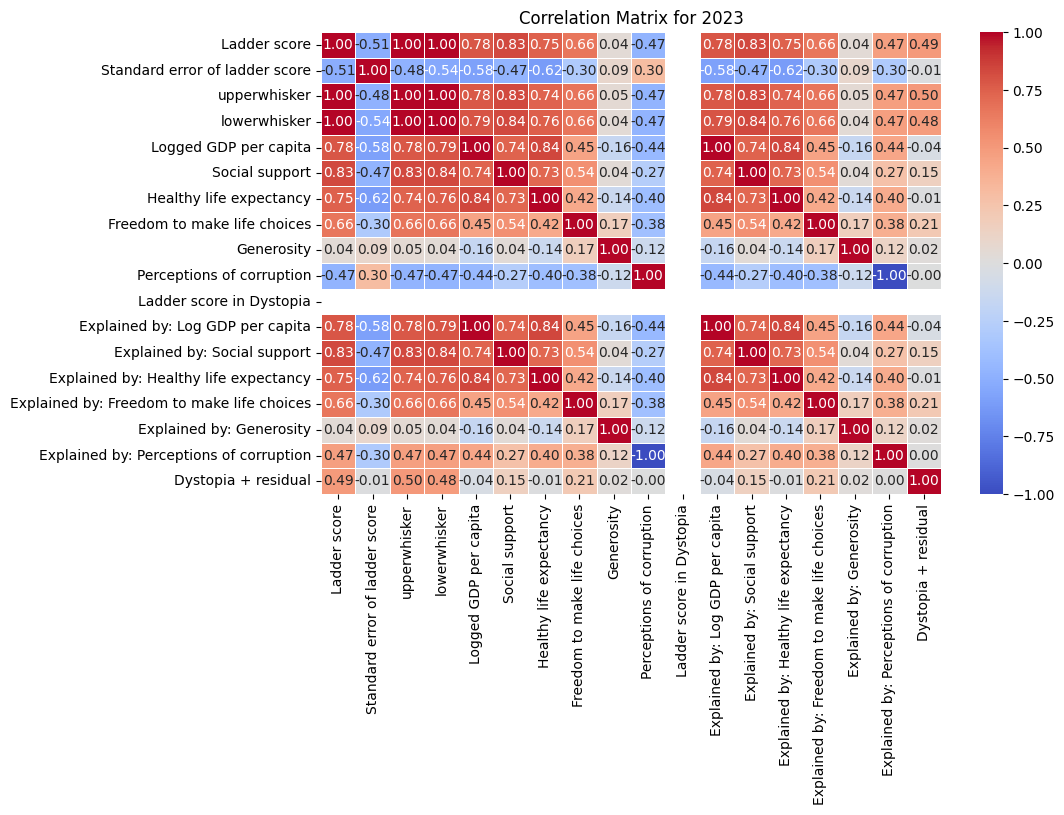

In [16]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for 2023')
plt.show()

#### Rest all the years

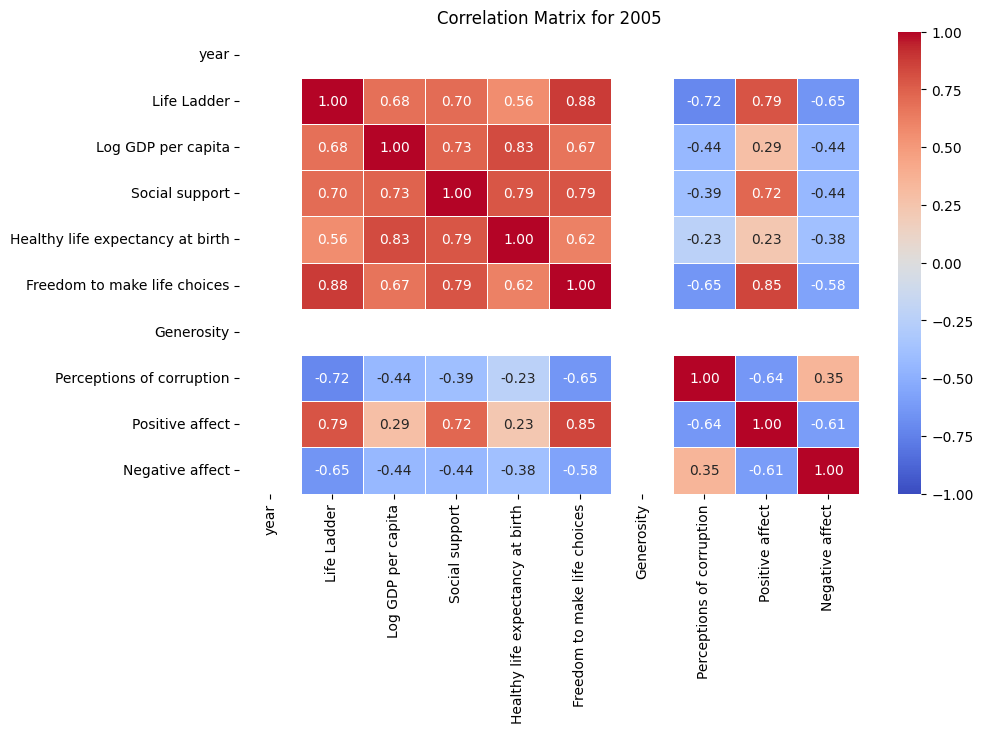

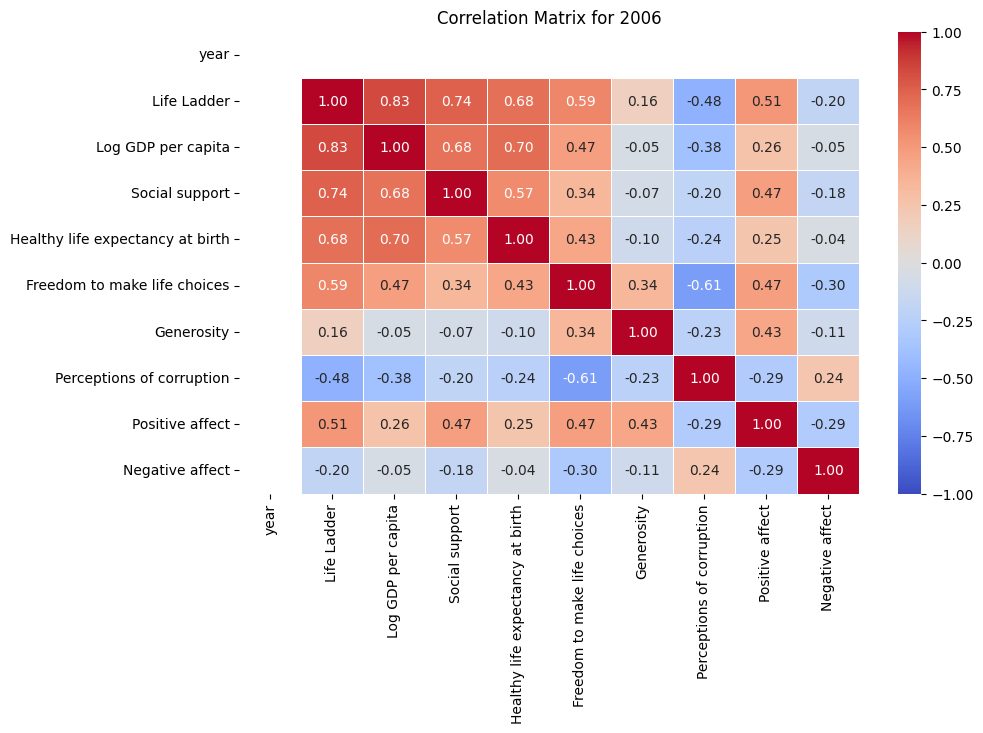

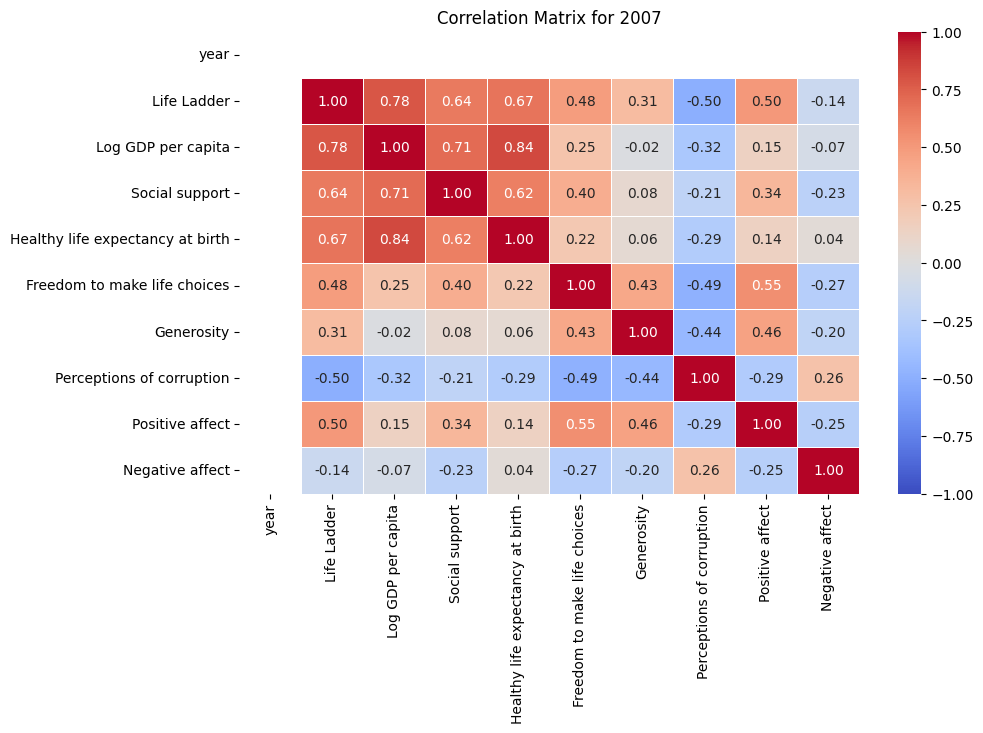

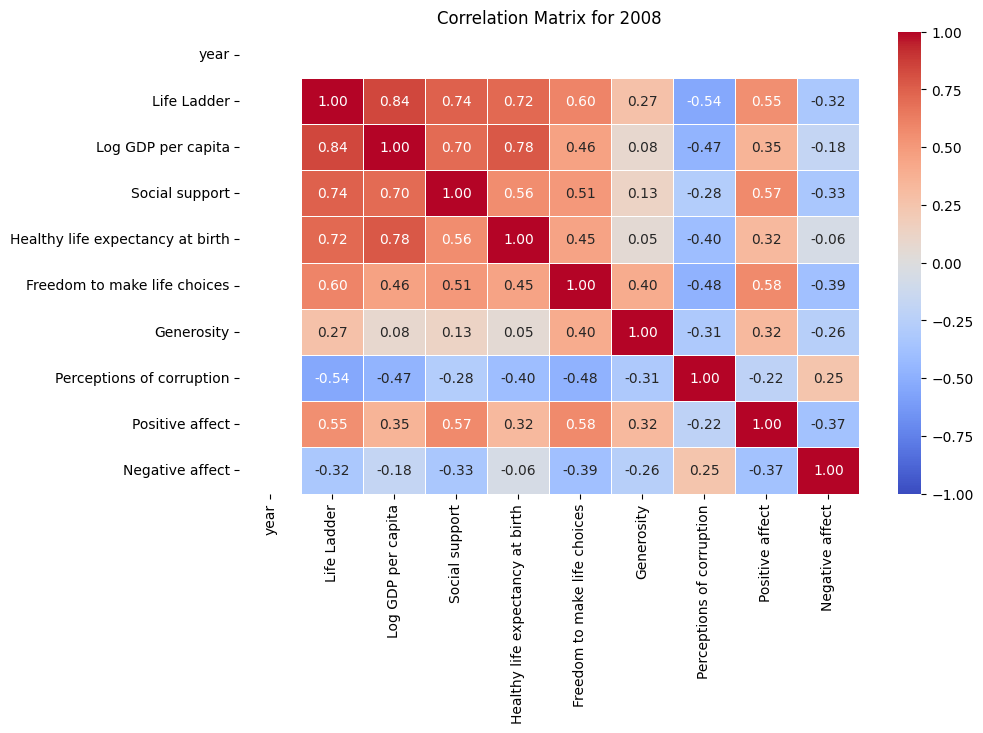

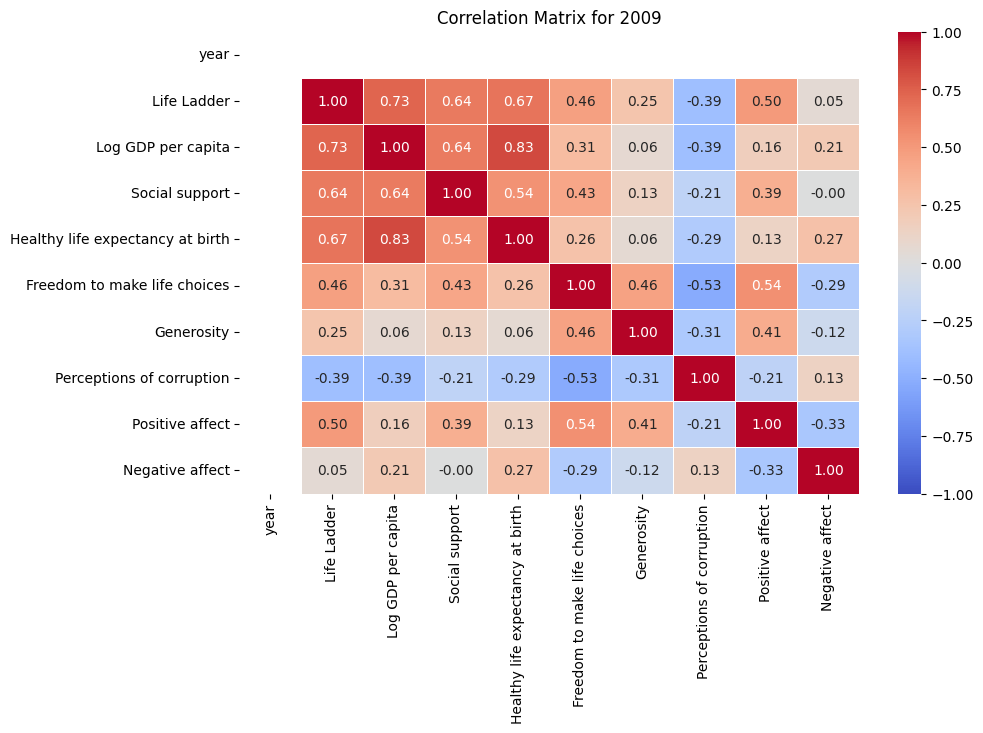

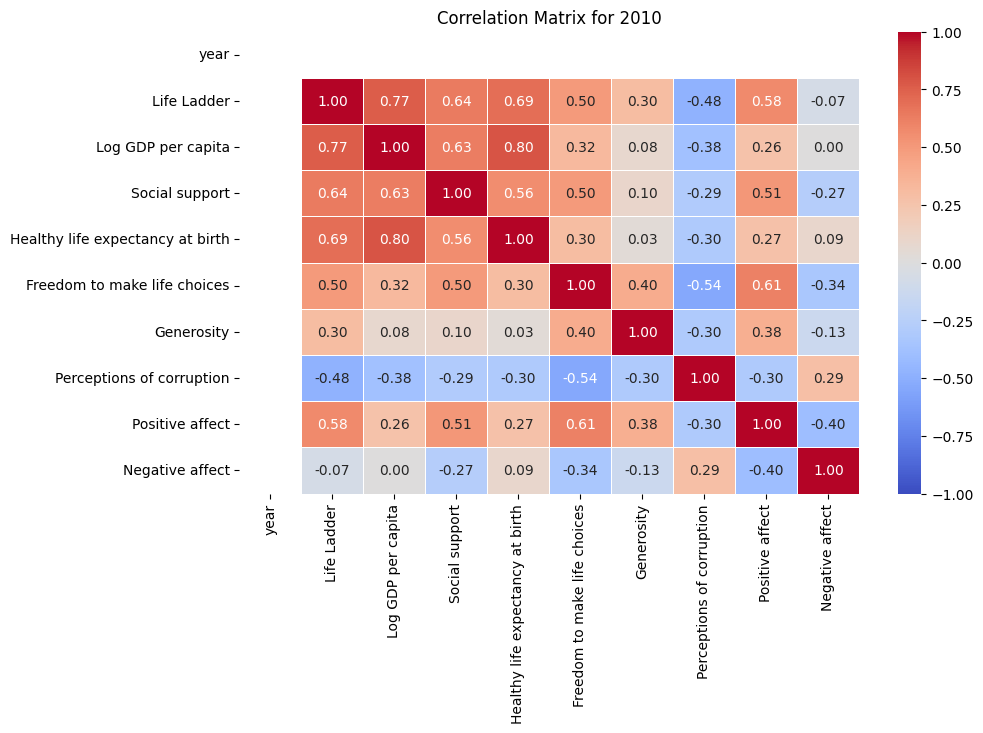

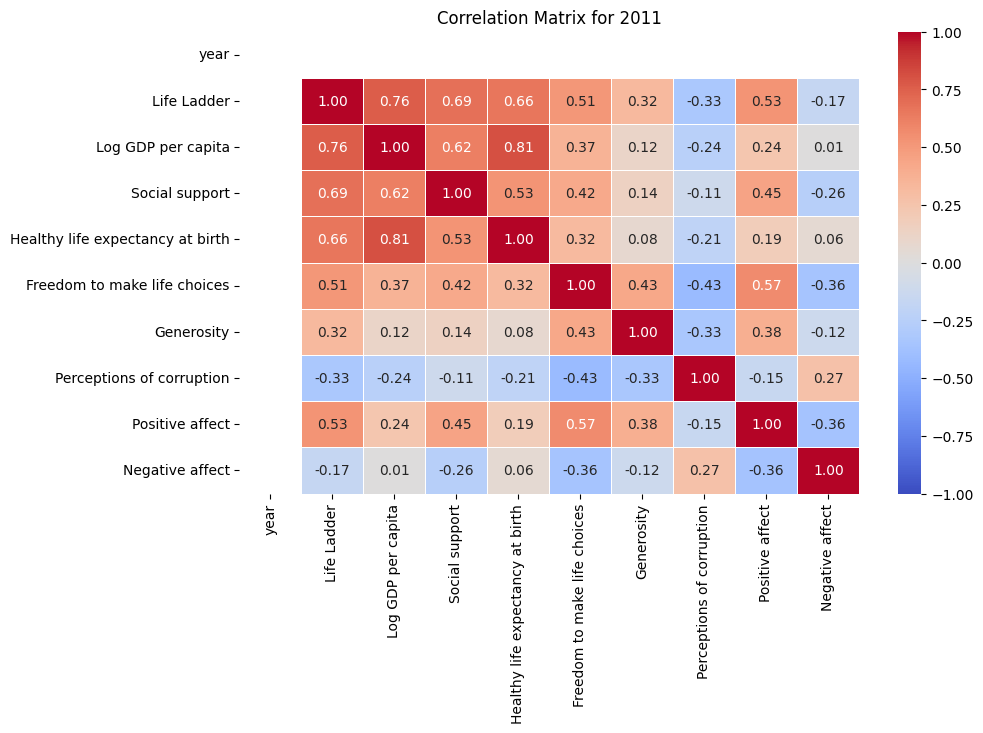

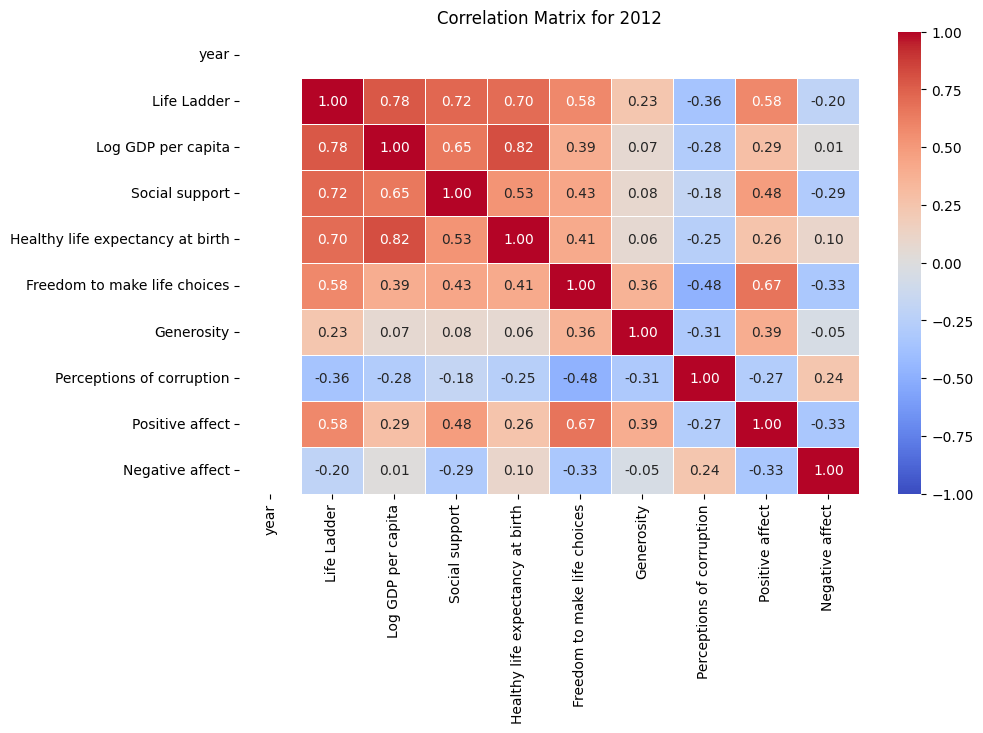

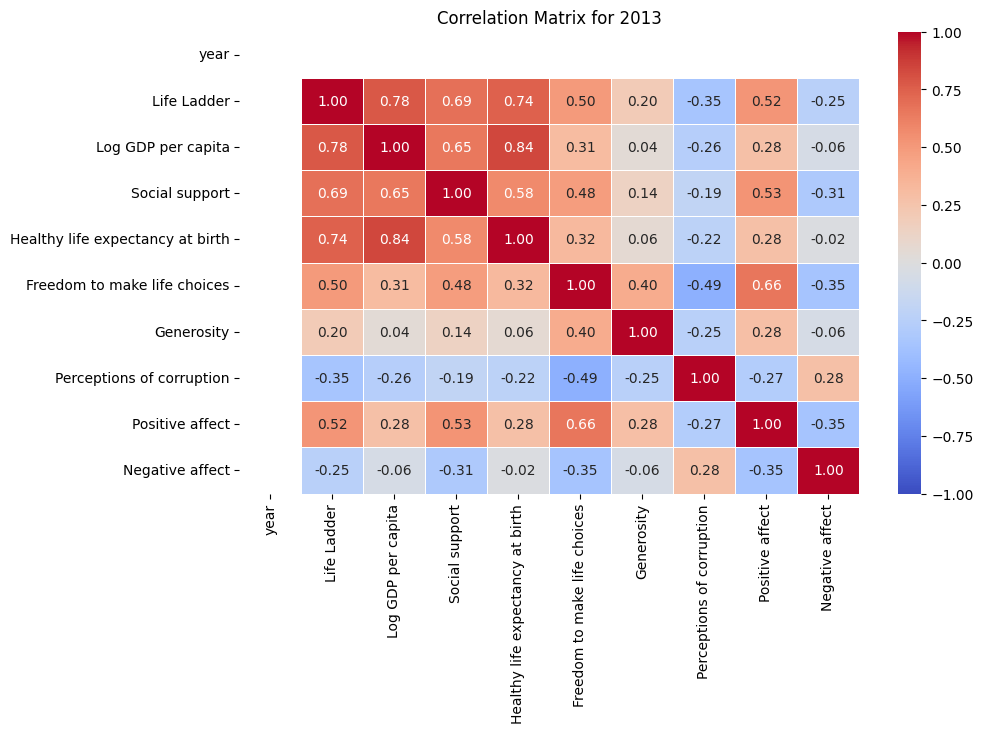

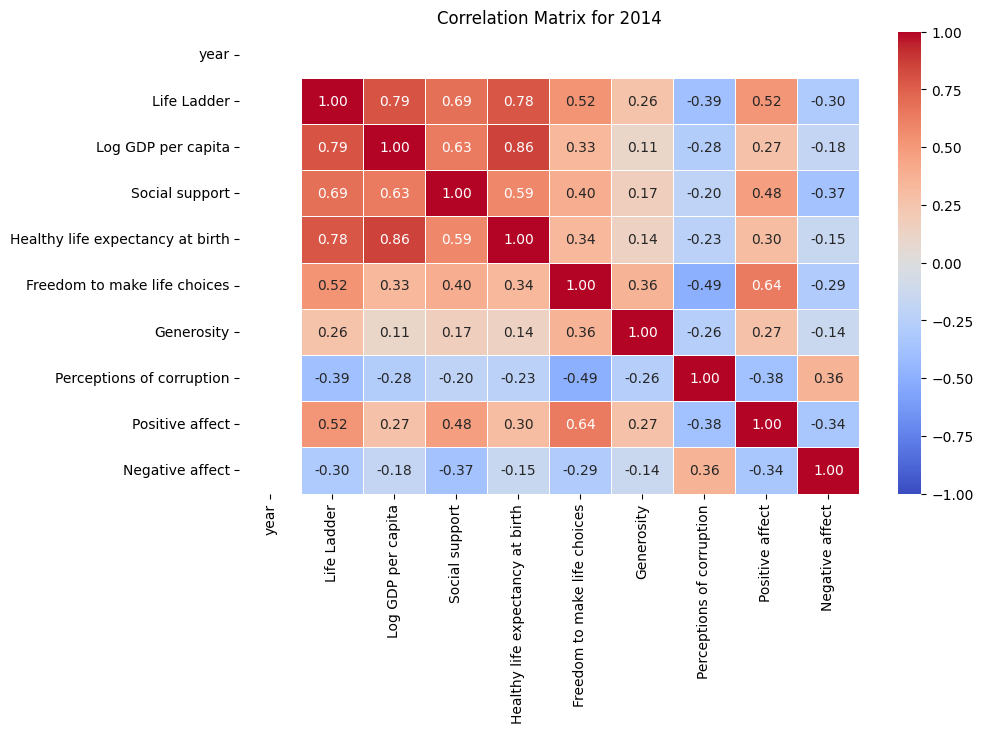

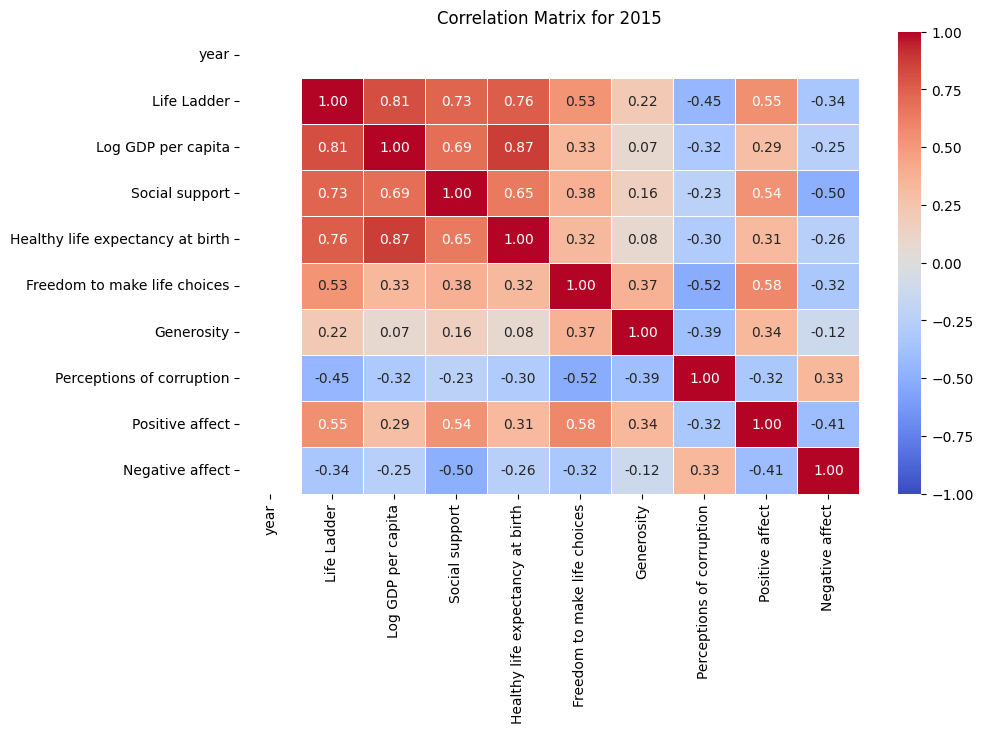

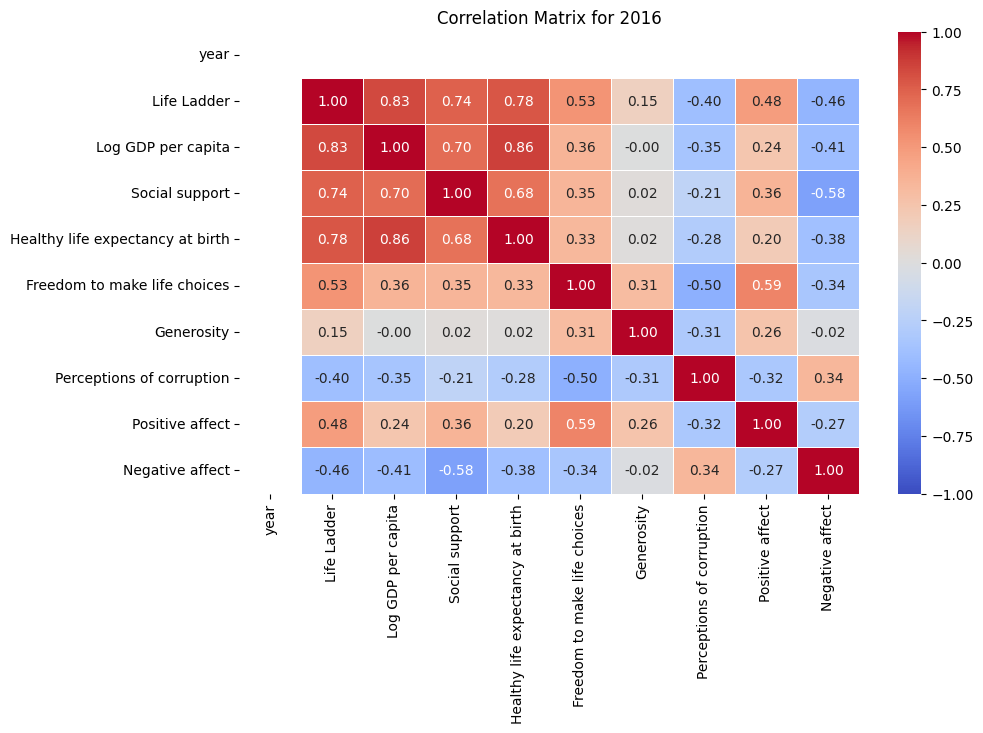

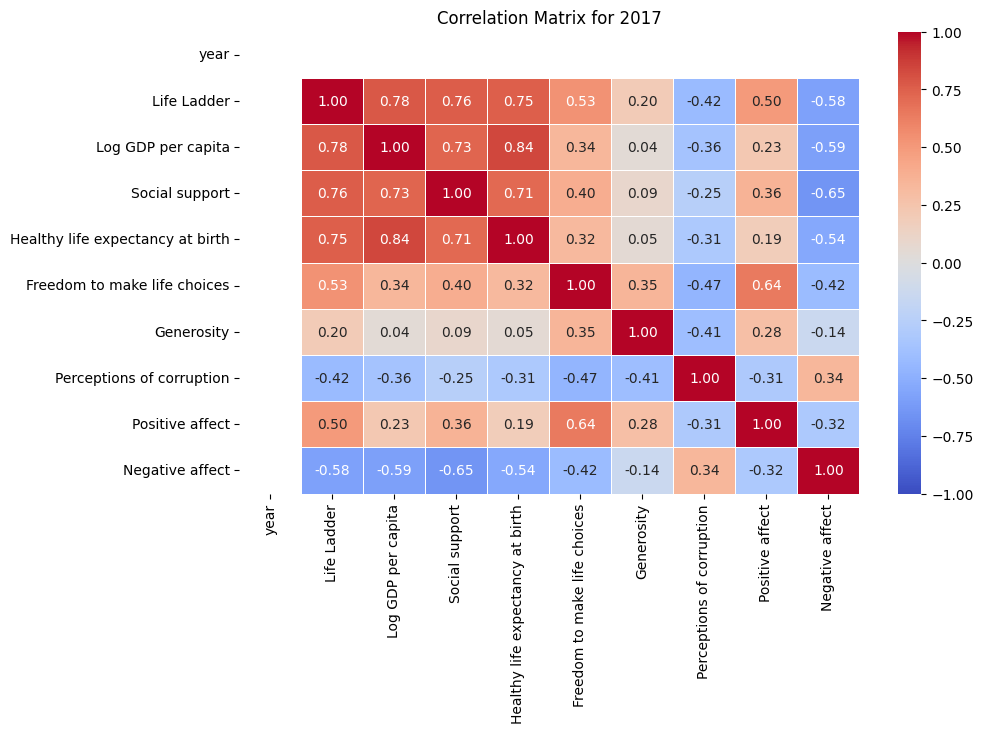

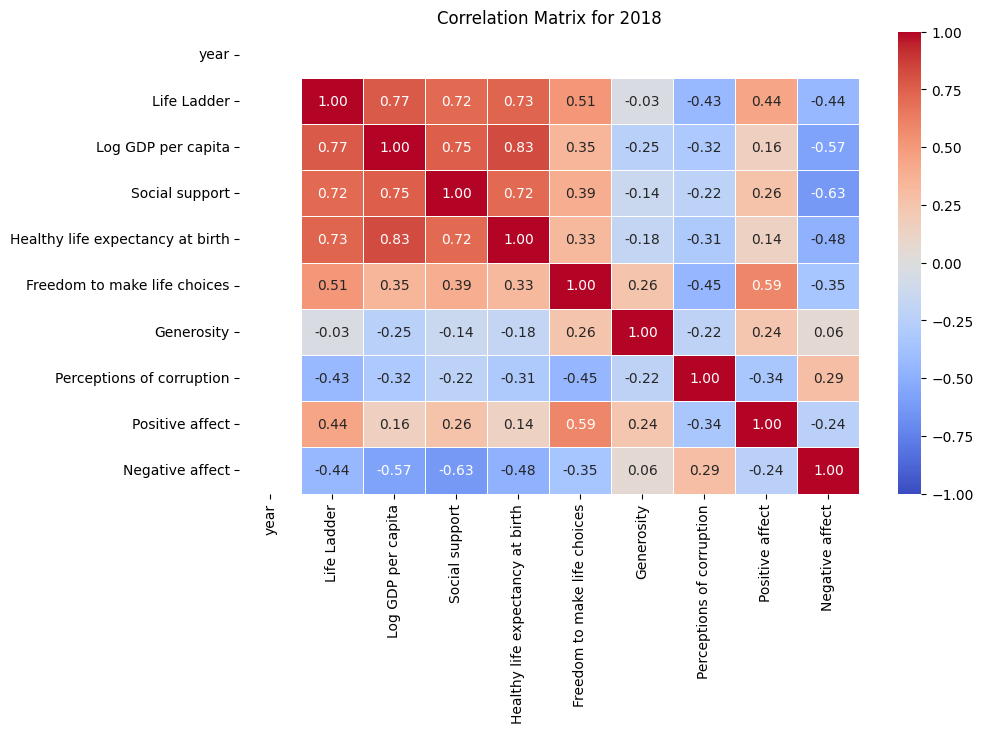

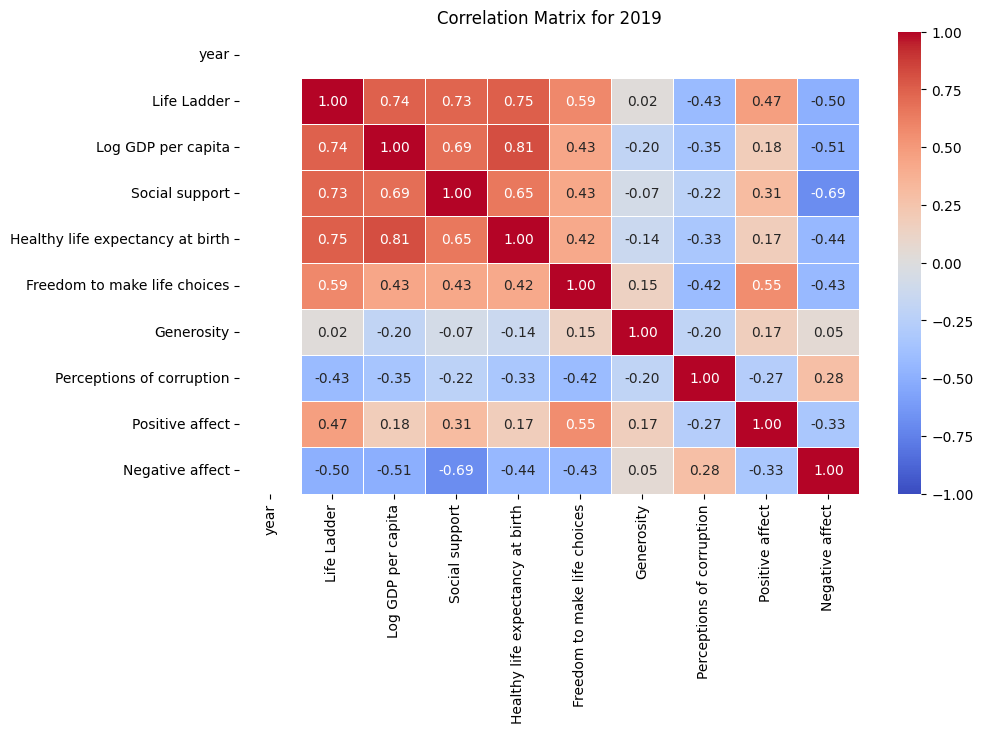

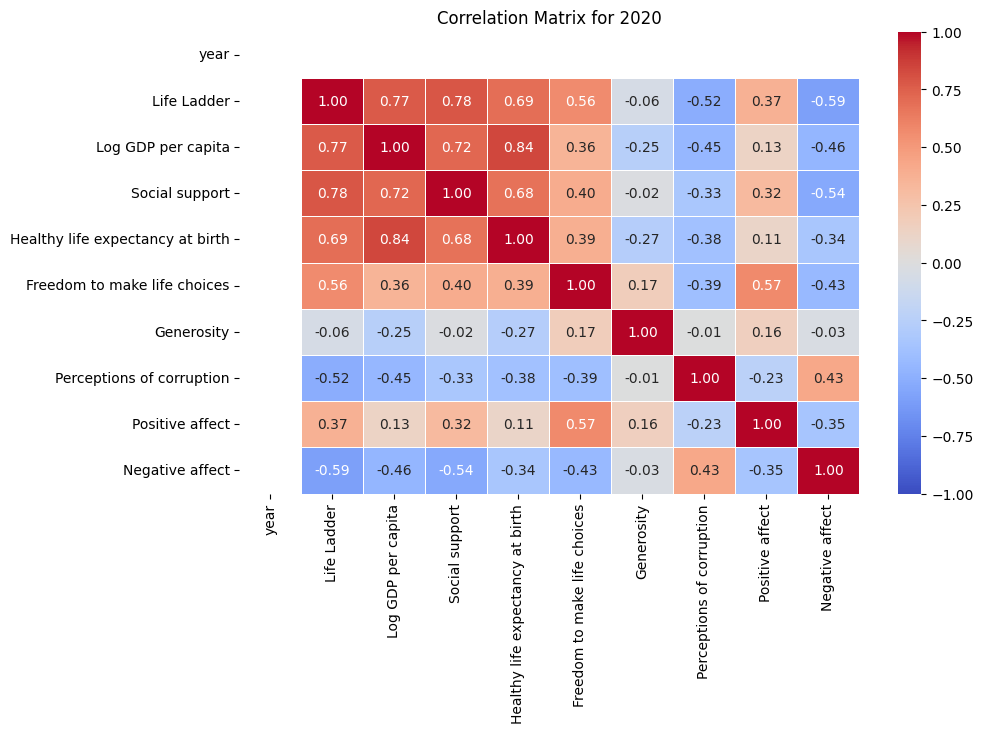

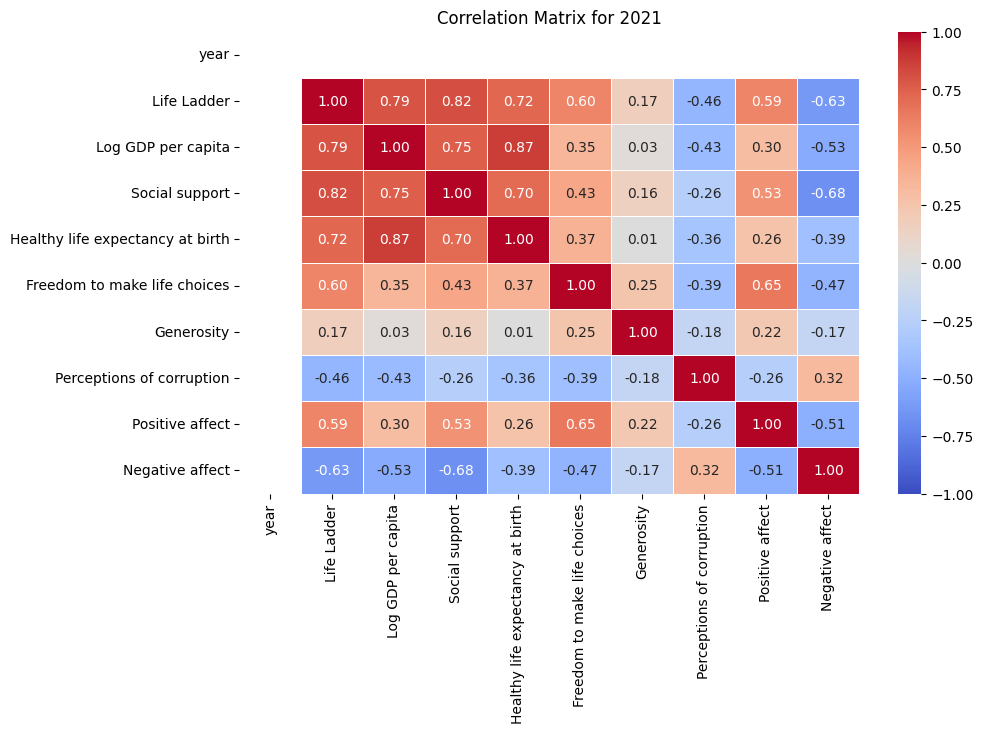

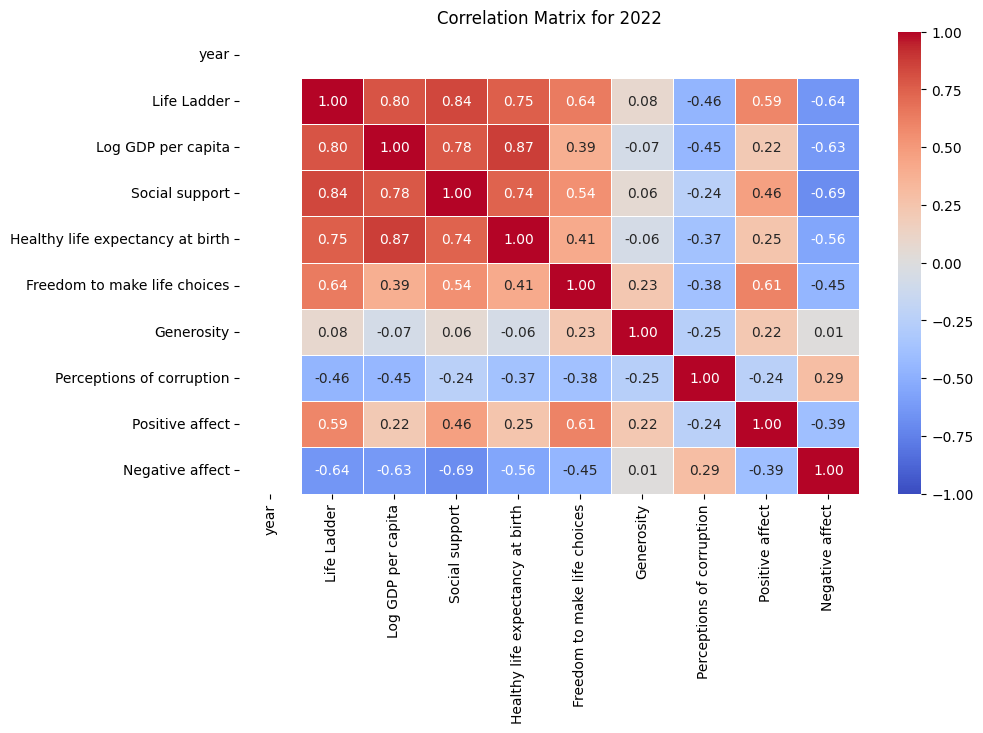

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df2.select_dtypes(include=['float64', 'int64'])

# # Calculate correlation matrix
# correlation_matrix = numerical_df.corr()

# Group data by year
grouped_df = numerical_df.groupby('year')

# Plot correlation matrix year-wise
for year, data in grouped_df:
    correlation_matrix = data.corr()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {year}')
    plt.show()


### Are the minimum and maximum happiness scores reasonable? Are there any outliers?

#### 2023

Summary Statistics for 2023:
       Ladder score  Standard error of ladder score  upperwhisker  \
count    137.000000                      137.000000    137.000000   
mean       5.539755                        0.064672      5.666513   
std        1.139908                        0.023005      1.117421   
min        1.859000                        0.028552      1.922712   
25%        4.723900                        0.046871      4.980320   
50%        5.684300                        0.060127      5.796732   
75%        6.333800                        0.077148      6.441343   
max        7.804200                        0.146538      7.875078   

       lowerwhisker  Logged GDP per capita  Social support  \
count    137.000000             137.000000      137.000000   
mean       5.412998               9.449785        0.799045   
std        1.163709               1.207315        0.129188   
min        1.795288               5.526723        0.341341   
25%        4.495800               8.590

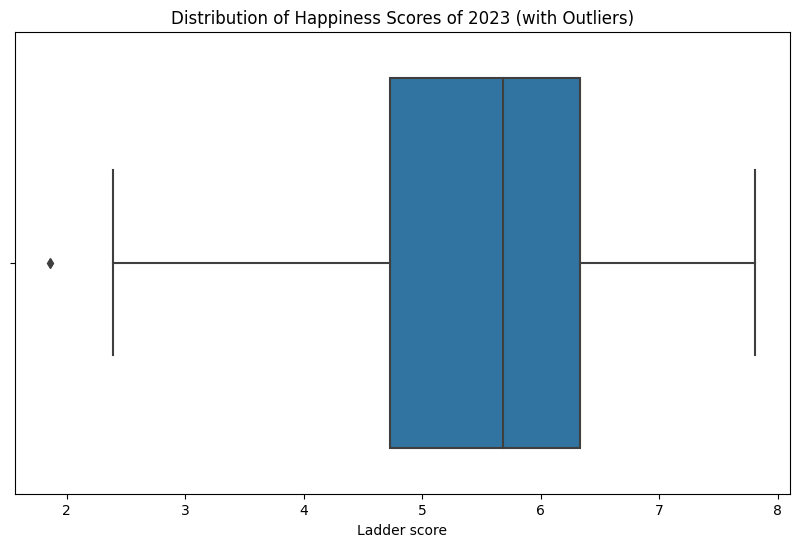

Outliers:
    Country name  Ladder score  Standard error of ladder score  upperwhisker  \
136  Afghanistan         1.859                        0.032506      1.922712   

     lowerwhisker  Logged GDP per capita  Social support  \
136      1.795288               7.324032        0.341341   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
136                 54.71241                      0.381642   -0.081011   

     Perceptions of corruption  Ladder score in Dystopia  \
136                   0.847215                  1.777825   

     Explained by: Log GDP per capita  Explained by: Social support  \
136                            0.6446                           0.0   

     Explained by: Healthy life expectancy  \
136                               0.086704   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
136                                         0.0                  0.092965   

     Explained by: Perceptions of corruption  D

In [22]:
# Check summary statistics
summary_stats = df.describe()
print("Summary Statistics for 2023:")
print(summary_stats)

# Visualize distribution with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ladder score', data=df)
plt.title('Distribution of Happiness Scores of 2023 (with Outliers)')
plt.show()

# Check for outliers
Q1 = df['Ladder score'].quantile(0.25)
Q3 = df['Ladder score'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['Ladder score'] < Q1 - 1.5 * IQR) | (df['Ladder score'] > Q3 + 1.5 * IQR)]

if not outliers.empty:
    print("Outliers:")
    print(outliers)
else:
    print("No outliers found.")

#### Rest all the years


Summary Statistics for Life Ladder in 2005:
count    27.000000
mean      6.446164
std       0.919143
min       4.718734
25%       5.539227
50%       6.619550
75%       7.161203
max       8.018934
Name: Life Ladder, dtype: float64

No outliers found for Life Ladder in 2005

Summary Statistics for Life Ladder in 2006:
count    89.000000
mean      5.196935
std       1.094558
min       3.202429
25%       4.460158
50%       5.083987
75%       5.954443
max       7.672449
Name: Life Ladder, dtype: float64

No outliers found for Life Ladder in 2006

Summary Statistics for Life Ladder in 2007:
count    102.000000
mean       5.418291
std        1.047901
min        3.280247
25%        4.670226
50%        5.221508
75%        6.122098
max        7.834233
Name: Life Ladder, dtype: float64

No outliers found for Life Ladder in 2007

Summary Statistics for Life Ladder in 2008:
count    110.000000
mean       5.418554
std        1.169434
min        2.807855
25%        4.604074
50%        5.181937
75%  

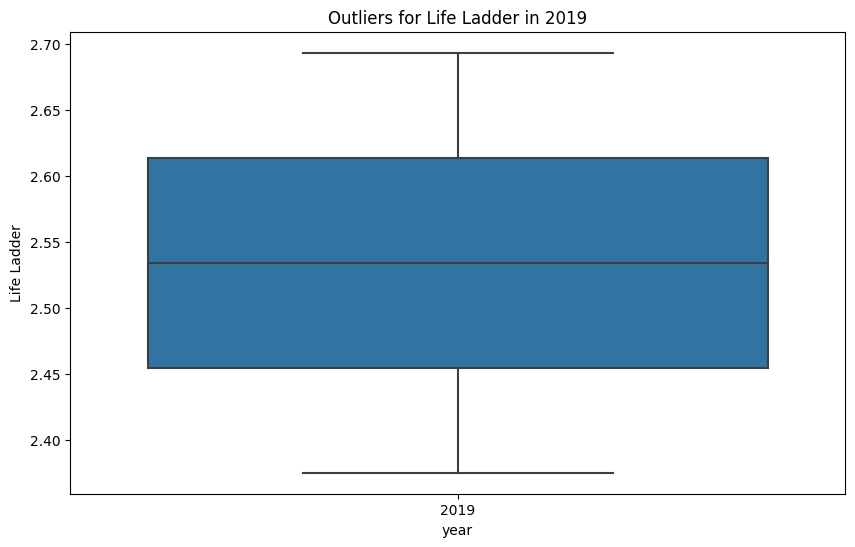


Summary Statistics for Life Ladder in 2020:
count    116.000000
mean       5.727539
std        0.989078
min        2.633753
25%        4.988826
50%        5.769428
75%        6.406675
max        7.889350
Name: Life Ladder, dtype: float64

Outliers for Life Ladder in 2020 :
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
1115      Lebanon  2020     2.633753            9.531043          0.5466   

      Healthy life expectancy at birth  Freedom to make life choices  \
1115                         66.074997                      0.551601   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
1115   -0.136191                   0.883977         0.352249           0.4818  


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


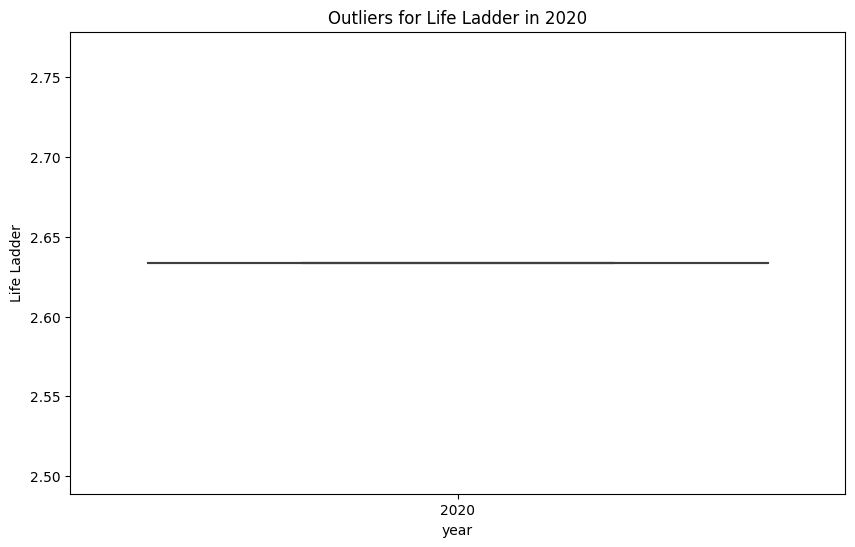


Summary Statistics for Life Ladder in 2021:
count    122.000000
mean       5.636193
std        1.139057
min        2.178809
25%        4.922029
50%        5.781278
75%        6.444900
max        7.794378
Name: Life Ladder, dtype: float64

Outliers for Life Ladder in 2021 :
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
12    Afghanistan  2021     2.436034            7.324032        0.454175   
1116      Lebanon  2021     2.178809            9.470949        0.506775   

      Healthy life expectancy at birth  Freedom to make life choices  \
12                           54.549999                      0.394306   
1116                         66.150002                      0.422697   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
12     -0.081011                   0.946299         0.178886         0.606713  
1116   -0.161281                   0.905279         0.263487         0.569101  


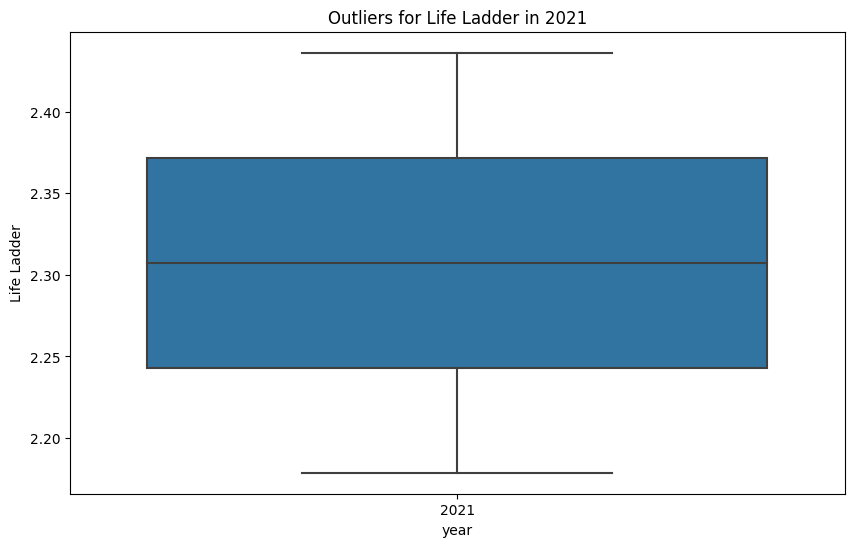


Summary Statistics for Life Ladder in 2022:
count    114.000000
mean       5.585126
std        1.265302
min        1.281271
25%        4.715273
50%        5.891891
75%        6.478360
max        7.728998
Name: Life Ladder, dtype: float64

Outliers for Life Ladder in 2022 :
   Country name  year  Life Ladder  Log GDP per capita  Social support  \
13  Afghanistan  2022     1.281271                 NaN        0.228217   

    Healthy life expectancy at birth  Freedom to make life choices  \
13                            54.875                      0.368377   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
13         NaN                   0.733198         0.205868         0.575512  


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


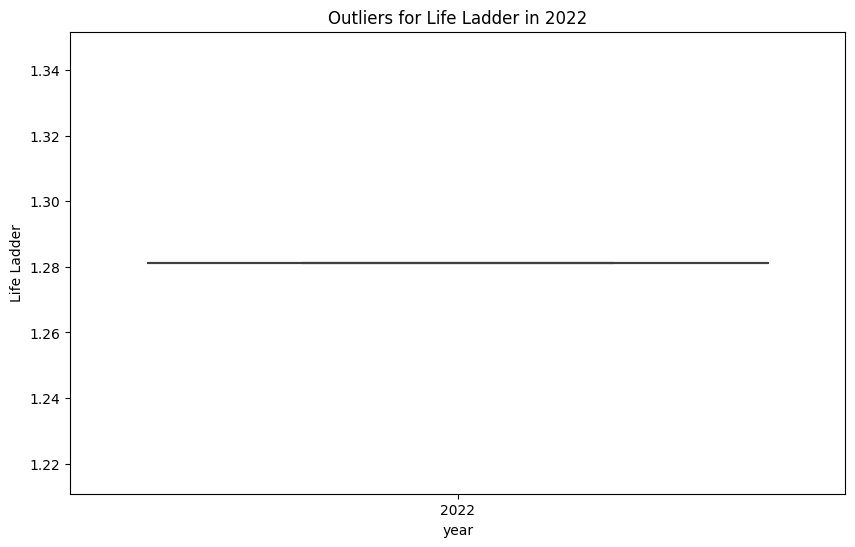

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by year
grouped_df = df2.groupby('year')

# Iterate over each year
for year, data in grouped_df:
    print(f"\nSummary Statistics for Life Ladder in {year}:")
    summary_stats = data['Life Ladder'].describe()
    print(summary_stats)

    # Check for outliers
    Q1 = data['Life Ladder'].quantile(0.25)
    Q3 = data['Life Ladder'].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = data[(data['Life Ladder'] < Q1 - 1.5 * IQR) | (data['Life Ladder'] > Q3 + 1.5 * IQR)]

    if not outliers.empty:
        print("\nOutliers for Life Ladder in", year, ":")
        print(outliers)
        
        # Visualize outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='year', y='Life Ladder', data=outliers)
        plt.title(f'Outliers for Life Ladder in {year}')
        plt.show()
    else:
        print("\nNo outliers found for Life Ladder in", year)


### What is the mean happiness score?

In [24]:
# Calculate mean happiness score
mean_score = df['Ladder score'].mean()
print("Mean happiness score for 2023 :", mean_score)

Mean happiness score for 2023 : 5.539755476652271


In [35]:
# Calculate mean happiness score for each year
mean_scores = df2.groupby('year')['Life Ladder'].mean()
print("Mean happiness score for each year:")
print(mean_scores)


Mean happiness score for each year:
year
2005    6.446164
2006    5.196935
2007    5.418291
2008    5.418554
2009    5.457640
2010    5.496782
2011    5.424088
2012    5.443612
2013    5.393302
2014    5.386267
2015    5.400948
2016    5.396381
2017    5.460421
2018    5.498683
2019    5.570995
2020    5.727539
2021    5.636193
2022    5.585126
Name: Life Ladder, dtype: float64
